### <div align='center'> Selecting an Error Metric </div>

----

To identify a suitable error metric for measuring the quality of our estimates, it is first necessary to establish an intuitive understanding of the scheme for weighting error that is most appropriate for our model's use case.

Consider the home-owner who observes a predicted value of 6,000,000.00 dollars for his home when his home's "true" value is 5,000,000.00 dollars. Additionally, consider the home owner who observes a predicted value of 500,000.00 dollars for his home when infact his home's "true" value is 600,000.00 dollars.

Most error metrics would assign error values linearly or quadratically proportional to the euclidean distance between the two points in each case, meaning the first estimate would be considered 10x worse than the second or 100x worse than the second. This approach is clearly not suitable for the case just stated, rather we would prefer a metric that assigned equal absolute importance to both cases, but with different signs.

More formally, we want some function f for which

$$ f(\hat{y_{i}}, y_{i}) = f(\alpha \hat{y_{i}}, \alpha y_{i}) \\ \forall \ \alpha >0 \\ and \\ f(\hat{y_{i}}, y_{i}) = -f(y_{i}, \hat{y_{i}})$$

While the obvious choice of f that that meets our criteria is, $f(\hat{y_{i}}, y_{i}) = \frac{\hat{y_{i}} - y_{i}}{y_{i}}$, we can quickly see this choice is bias towards underestimators of $y_{i}$ when we sum the absolute values since $y_{i}$ must always be greater than zero. Alternately, the candidate $f(\hat{y_{i}}, y_{i}) = log(\frac{\hat{y_{i}}}{y_{i}})$ meets both criteria listed above (proofs should be trivial) and at first glance appears to overcome the shortcoming of our other proposed metric. Lets experimentally validate the superior properties of this alternate error metric.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


x = np.linspace(5, 50, 100000)
y = 2*x + np.random.normal(12, 20, 100000)

def floor(y):
    return max(0.01, y)

fl = np.vectorize(floor)
y = fl(y)

def c1(y_hat, y):
    return (y_hat - y)/y

def c2(y_hat, y):
    return np.log(y_hat/y)

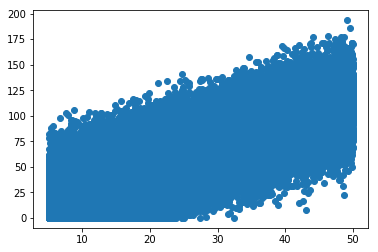

In [2]:
plt.scatter(x, y)

Above is a linear model $y_{i} = 2x_{i} + \epsilon_{i}$ whose values are floored at zero. Lets record a series of statistics for the values produced by a variety of linear models with different bias terms.

In [3]:
mean = []
var = []
beta_0 = []
c1_err = []
c2_err = []
for bias in range(-20, 20, 1):
    ests = 2*x + bias
    err = ests - y
    mean.append(np.mean(err))
    var.append(np.var(err))
    beta_0.append(bias)
    c1_err.append(np.mean(np.abs(c1(ests, y))))
    c2_err.append(np.mean(np.abs(c2(ests, y))))

/home/ben/.envs/Invest-LA/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/ben/.envs/Invest-LA/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


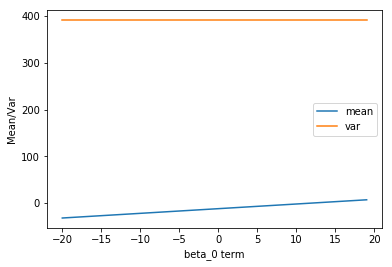

In [4]:
plt.plot(beta_0, mean)
plt.plot(beta_0, var)
plt.xlabel('beta_0 term')
plt.ylabel('Mean/Var')
plt.legend(['mean', 'var'])

We iterate over a series of models starting with bias terms from $\beta_{0} = -20$ to $\beta_{0} = 20$ and plot the mean and variance of the distribution of $\hat{y_{i}} - y_{i}$ above. A good error metric would be minimized for the model corresponding to $\beta_{0} = 12$ as this model has identical variance to all other models tested and has the lowest bias of approximately zero.

Text(0, 0.5, 'Mean')

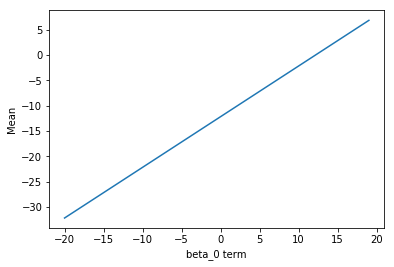

In [5]:
plt.plot(beta_0, mean)
plt.xlabel('beta_0 term')
plt.ylabel('Mean')


Text(0, 0.5, 'C1 Error')

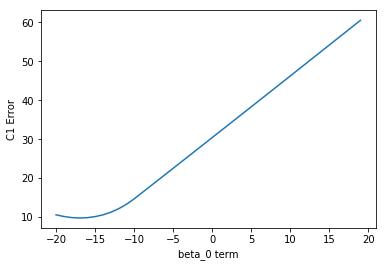

In [6]:
plt.plot(beta_0, c1_err)
plt.xlabel('beta_0 term')
plt.ylabel('C1 Error')

Text(0, 0.5, 'C2 Error')

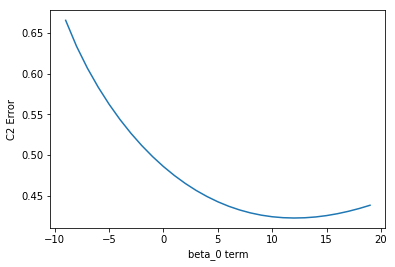

In [7]:
plt.plot(beta_0, c2_err)
plt.xlabel('beta_0 term')
plt.ylabel('C2 Error')

We see however that our c1 error metric is minimized by a model that dramatically underestimates the true values of y, whereas our c2 error metric is minimzed  for the model that is the least bias while still retaining the characteristics we originally desired.

$$ C2 = \frac{1}{n} \sum_{i=1}^{n} | log(\frac{\hat{y_{i}}}{y_{i}}) |$$

In [8]:
def mean_log_err(y_true, y_pred):
    return np.mean(np.abs(np.log(y_pred) - np.log(y_true)))